In [1]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
%matplotlib inline

In order to create some reasonalbe values, for each product we draw a demand curve for each customer and we evaluate the marginal reward given by them in each point. In order to make this analysis we assume that there is no indirect reward from other products.

In [2]:
# distribution of customers
customer_distribution = [0.3, 0.5, 0.2]

We model the demand curve of a customer as: 1 - phi(price, mu, sigma) where phi() is the cumulative distribution function of 
a Gaussian distribution with mean mu and standard deviation sigma. We choose for each customer the hyper-parameters mu and sigma.
Sigma controls the smoothness of the curve. If this value is low, we have that the demand curve changes very quickly when it 
approaches the price equal to mu.

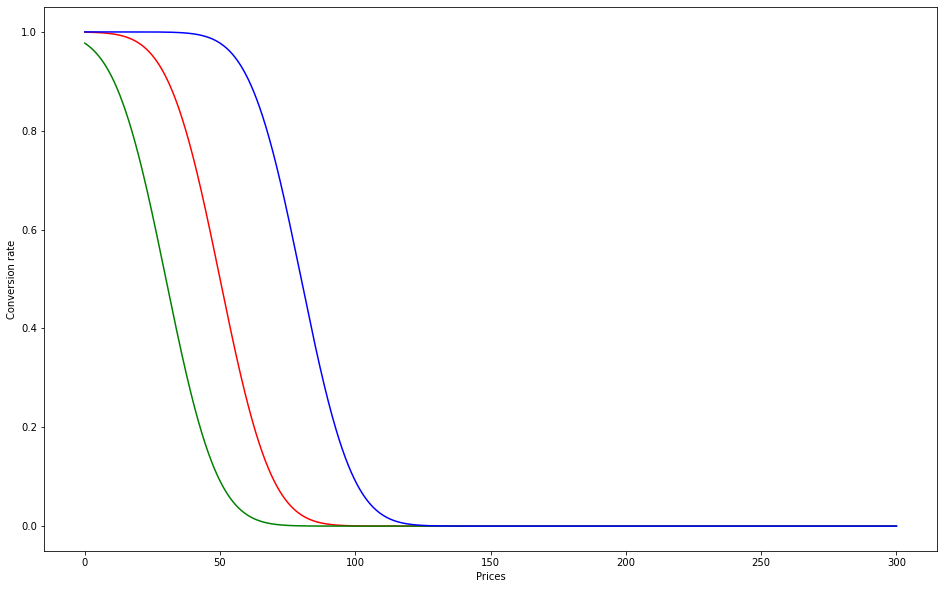

In [14]:
MAXIMUM_PRICE = 300
cents = 100

prices = np.linspace(0, MAXIMUM_PRICE, cents * MAXIMUM_PRICE) # we consider the range of prices that go from 0 to 300
mu_1 = 50 
mu_2 = 30
mu_3 = 80


sigma_1 = 15 
sigma_2 = 15
sigma_3 = 15
conversion_rates_1 = 1 - norm.cdf(prices, loc=mu_1, scale=sigma_1)
conversion_rates_2 = 1 - norm.cdf(prices, loc=mu_2, scale=sigma_2)
conversion_rates_3 = 1 - norm.cdf(prices, loc=mu_3, scale=sigma_3)
plt.figure(figsize=(16,10))
plt.plot(prices, conversion_rates_1, color="red")
plt.plot(prices, conversion_rates_2, color="green")
plt.plot(prices, conversion_rates_3, color="blue")
plt.xlabel("Prices")
plt.ylabel("Conversion rate")
plt.show()


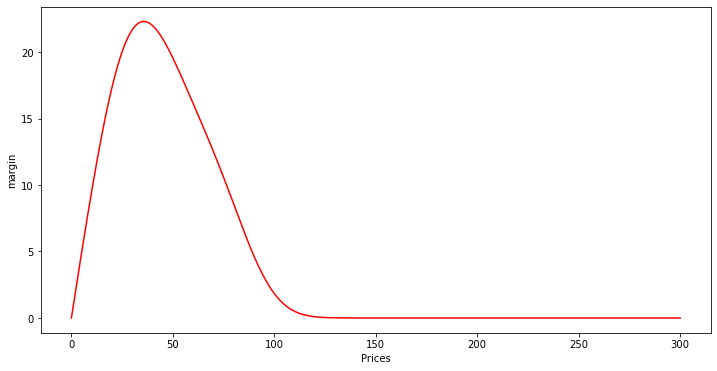

In [15]:
expected_margin = prices * (conversion_rates_1 * customer_distribution[0] +
                            conversion_rates_2 * customer_distribution[1] +
                            conversion_rates_3 * customer_distribution[2])

plt.figure(figsize=(12,6))
plt.plot(prices, expected_margin, color="red")
plt.xlabel("Prices")
plt.ylabel("margin")
plt.show()

From the plot above we can take prices 120, 145, 160, 180 that present very different margins.

In [12]:
selected_prices = np.array([45, 60, 75, 90]) * cents
product1_margins = [expected_margin[p] for p in selected_prices]
product1_margins

[12.034366078432107, 6.706633149659867, 2.6754239345291855, 0.8935181857468868]

now we can find the conversion rates corresponding to the prices:


In [13]:
c1_p1 = [conversion_rates_1[p] for p in selected_prices] 
c1_p2 = [conversion_rates_2[p] for p in selected_prices]
c1_p3 = [conversion_rates_3[p] for p in selected_prices]
print(c1_p1, c1_p2, c1_p3)

[0.19077675061738075, 0.10564064119356664, 0.05207462088964887, 0.02274608279441681] [0.40126467351353323, 0.1586310572623434, 0.040048373019056394, 0.006207036486022277] [0.04778040505633585, 0.003828861322253574, 0.0001227863666435347, 1.5291381725290876e-06]
